**Q2 - NORMALIZING EQUATIONS**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from google.colab import files
#uploaded = files.upload()


data = pd.read_csv('insurance.txt')
train_rmse = []
test_rmse = []
weights = []

def preproc(data):                                
    #Independent variables extracted from dataframe
    X = data.iloc[:,:-1].to_numpy()               
    
    #Dependent variables extracted from dataframe
    Y = data.iloc[:,-1].to_numpy()                
    
    #Normalising X 
    X[:, 0:2] = (X[:, 0:2] - X[:, 0:2].mean(axis = 0))/ X[:, 0:2].std(axis = 0) 

    #Scaling Y 
    standard_fac = np.median(Y, axis = 0) 
    Y = Y / np.median(Y, axis = 0)

    #Appeding column of ones for the bias foe X
    one = np.ones((X.shape[0],1))
    X = np.concatenate((one, X), axis = 1)
    Y = Y.reshape((Y.shape[0], 1))
    
    return X, Y, standard_fac

class LinearRegression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y 
        self.W = np.ones((1, X.shape[1]))  
        #weight vector
        
    def train_test_split(self, splt = 0.7):    
       #generate training and test set
        
        split_size = int(X.shape[0] * splt)
        
        X_train = X[:split_size, :]
        X_test = X[split_size:, :]
        Y_train = Y[:split_size, :]
        Y_test = Y[split_size:, :]
        
        
        return X_train, Y_train, X_test, Y_test
    
    def norm_model(self, X_train, Y_train):
        W = np.matmul((np.linalg.inv(np.matmul(X_train.T,X_train))) , np.matmul(X_train.T, Y_train)).T 
        # W = [(X'X)^-1]X'Y Normal equation

        self.W = W
        #Weights W = [w0 w1 w2 w3] w0 = bias, w1 = weight of age(normalized), w2 = weight of bmi(normalized), w3 = weight of number of children(normalized)
        return W
    
    def predict(self, X_test):      
        #predictions using the obtained regression weights
        pred = np.matmul(X_test, self.W.T) 
        
        return pred
    
    def root_mean_sqr_error(self, pred, Y_test, stand_fac):    
        #cost calculation
        m = Y_test.shape[0]
        rmse = np.sqrt((1/m) * np.sum(np.square(stand_fac * (pred - Y_test))))
        
        return rmse

for m in range(20):
    data = data.sample(frac = 1, random_state = m)

    X, Y, standardizing_factor = preproc(data)      
    lg = LinearRegression(X, Y)
    X_tr, Y_tr, X_tes, Y_tes = lg.train_test_split()
    weight = lg.norm_model(X_tr, Y_tr)
    p_tr = lg.predict(X_tr)     
    p_tes = lg.predict(X_tes)
    rmse_tr = lg.root_mean_sqr_error(p_tr, Y_tr, standardizing_factor)
    rmse_tes = lg.root_mean_sqr_error(p_tes, Y_tes, standardizing_factor)
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_tes)
    weights.append(weight)                



**Q2 - GRADIENT DESCENT**

Loading Libraries

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd

Initialization

In [ ]:
def initialisation(len_theta):
    theta = np.random.randn(1, len_theta)
    bias = 0
    return theta, bias

In [ ]:
def forwardPropagation(x, theta, bias):
    z = np.matmul(theta, x) + bias
    return z

In [ ]:
def cost_function(z, y):
    m = y.shape[1]
    J = 1/m * np.sum(np.square(z - y))
    return J

In [ ]:
def backPropagation(x, y, z):
    m = y.shape[1]
    der_z = 1/m * (z - y)
    der_theta = np.matmul(der_z, x.T)
    der_bias = np.sum(der_z)
    return der_theta, der_bias

Gradient Descent

In [ ]:
def gradient_descent(theta, bias, der_theta, der_bias, alpha):
    theta = theta - alpha*der_theta
    bias = bias - alpha*der_bias
    return theta, bias

In [ ]:
def predict(x_data, theta, bias):
  return (np.matmul(theta, x_data) + bias)

Hypothesis and parameterization

In [ ]:
def hypothesis(x_train, y_train, x_test, y_test, alpha, iterations, median):
    len_theta = x_train.shape[0]
    theta, bias = initialisation(len_theta)
    costs = []
    errors = []
    m_train = y_train.shape[1]
    m_test = y_test.shape[1]

    for i in range(1, iterations+1):
        z_train = forwardPropagation(x_train, theta, bias)
        cost_train = cost_function(z_train, y_train)
        der_theta, der_bias = backPropagation(x_train, y_train, z_train)
        theta, bias = gradient_descent(theta, bias, der_theta, der_bias, alpha)
        costs.append(cost_train)
        train_accuracy = (1/m_train) * np.sum(np.square((z_train-y_train) * median))
        errors.append(train_accuracy)
        
        z_test = forwardPropagation(x_test, theta, bias)
        cost_test = cost_function(z_test, y_test)
        test_accuracy = (1/m_test) * np.sum(np.square((z_test-y_test) * median))

        # if i%100 == 0:
        #     print ('Epoch ' + str(i) + '/' + str(iterations) + ': ')
        #     print ('Training Cost ' + str(cost_train) + '|' + 'Testing Cost' + str(cost_test))
        #     print ('Training Accuracy ' + str(train_accuracy) + '|' + 'Testing Accuracy' + str(test_accuracy))
    
    # plt.plot( np.array(range(iterations)), errors)
    # plt.xlabel('Iteration')
    # plt.ylabel('Training Error')
    # plt.title('Learing Rate: ' + str(alpha))
    # plt.show()

    train_root = np.sqrt(train_accuracy)
    test_root = np.sqrt(test_accuracy)
    return theta, bias, train_root, test_root

Preprocessing Data

In [ ]:
# importing and preprocessing data
data = pd.read_csv('insurance.txt')
def preprocessing(data, seed):
    

    y_data = data['charges']
    y_median = y_data.median()
    y_data = y_data/y_data.median()
    x_data = data.drop('charges', axis = 1)
    x_data = (x_data-x_data.mean())/x_data.std()


    # random shuffle
    num_rows = int(data.shape[0]*0.7)
    indices = np.array(range(data.shape[0]))
    np.random.seed(seed)
    np.random.shuffle(indices)
    train = indices[:num_rows]
    test = indices[num_rows:]

    # splitting data
    x_train, x_test = x_data.iloc[train].to_numpy(), x_data.iloc[test].to_numpy()
    y_train, y_test = y_data.iloc[train].to_numpy(), y_data.iloc[test].to_numpy()
    y_train = y_train.reshape((len(train), 1))
    y_test = y_test.reshape((len(test), 1))

    x_train, x_test = x_train.T, x_test.T
    y_train, y_test = y_train.T, y_test.T

    return x_train, y_train, x_test, y_test, y_median


In [ ]:
x_train, y_train, x_test, y_test, median_y = preprocessing(data, 0)

Testing Model

In [ ]:
final_theta, final_bias, error_train_final, error_test_final = hypothesis(x_train, y_train, x_test, y_test, 0.01, 1000, median_y)


In [ ]:
print('Final Weights: ' + str(final_theta), '\n')
print('Final Bias: ' + str(final_bias), '\n')
print('Minimum Training Error: '+ str(error_train_final), '\n')
print('Minimum Testing Error: ' + str(error_test_final), '\n')

Final Weights: [[0.37142682 0.21647328 0.07062691]] 

Final Bias: 1.394407468775965 

Minimum Training Error: 11195.982519780668 

Minimum Testing Error: 11724.788401778818 



In [ ]:
#predict(x_train, final_theta, final_bias)

In [ ]:
data = pd.read_csv('insurance.txt')
def comparison(iterations, learning_rate):
  error_list_train = []
  error_list_test = []
  for i in range(20):
    x_training, y_training, x_testing, y_testing, median_y = preprocessing(data, i)
    _, _, error_train_final, error_test_final = hypothesis(x_training, y_training, x_testing, y_testing, learning_rate, iterations, median_y)
    error_list_train.append(error_train_final)
    error_list_test.append(error_test_final)
  error_list_train = np.array(error_list_train)
  error_list_test = np.array(error_list_test)
  return error_list_train, error_list_test



In [ ]:
e_train, e_test = comparison(1000, 0.01)

In [ ]:
print('Min Training Error: ' + str(np.amin(e_train)))
print('Min Testing Error: ' + str(np.amin(e_test)))
print('Max Training Error: ' + str(np.amax(e_train)))
print('Max Testing Error: ' + str(np.amax(e_test)))
print('Training Error Mean: ' + str(np.mean(e_train)))
print('Testing Error Mean: ' + str(np.mean(e_test)))
print('Training Error Std Dev: ' + str(np.std(e_train)))
print('Testing Error Std Dev: ' + str(np.std(e_test)))



Min Training Error: 11093.597208156898
Min Testing Error: 10586.26380135618
Max Training Error: 11677.764135343676
Max Testing Error: 11988.280930249717
Training Error Mean: 11311.444998714678
Testing Error Mean: 11471.601928849588
Training Error Std Dev: 159.5918432744345
Testing Error Std Dev: 375.9569886795748


Q2 - STOCHASTIC GRADIENT DESCENT

In [ ]:
def SGD(x, y, epochs, learning_rate = 0.001):
 
    number_of_features = x.shape[1] 
    
    # Our case number of features = 3 (age, bmi and children)
    w = np.ones(shape=(1,number_of_features)) 
    b = 0
    total_samples = x.shape[0]
    cost_list = []
    iteration_list = []
    
    for i in range(epochs):    
        index = i % (total_samples)
        sample_x = x[index].reshape(3,1)
        sample_y = y[index][0]
        
        
        y_predicted = np.dot(w, sample_x) + b
        
        w_der = sample_x.T*(y_predicted-sample_y)
        b_der = (y_predicted-sample_y)
        
        w = (w - learning_rate * w_der)
        b = (b - learning_rate * b_der)
        
        cost = ((sample_y-y_predicted)*ymed)**2
        
        if i%50 == 0: # Every 50th iteration, record the cost and epoch value
            cost_list.append(int(cost))
            iteration_list.append(i)
            
        
    return w,b,cost_list,iteration_list



In [ ]:
def testing(x,y,w,b) :
  sum =0
  for i in range(x.shape[0]) :
    y_pred = np.dot(w,x[i].T) + b
    cost = ((y_pred-y[i][0])*ymed)**2
    sum += cost
  sum = np.sqrt((1/x.shape[0])*sum)
  return sum[0][0]

In [ ]:
data = pd.read_csv('insurance.txt')


y_data = data['charges']
x_data = data.drop('charges', axis = 1)
x_data = (x_data - x_data.mean())/x_data.std()
ymed = y_data.median()
y_data = y_data/ymed

# random shuffle

num_rows = int(data.shape[0]*0.7)
indices = np.array(range(data.shape[0]))
training_errors =[]
testing_errors = []
for i in range(20) :
  np.random.seed(i)
  np.random.shuffle(indices)
  train = indices[:num_rows]
  test = indices[num_rows:]

  # splitting data
  x_train, x_test = x_data.iloc[train].to_numpy(), x_data.iloc[test].to_numpy()
  y_train, y_test = y_data.iloc[train].to_numpy(), y_data.iloc[test].to_numpy()
  y_train = y_train.reshape((len(train), 1))
  y_test = y_test.reshape((len(test), 1))
  w_sgd, b_sgd,cost_list_sgd, epoch_list_sgd = SGD(x_train,y_train,10000)
  training_errors.append(np.sqrt((1/x_train.shape[0])*sum(cost_list_sgd)))
  testing_errors.append((testing(x_test,y_test,w_sgd,b_sgd)))

In [ ]:
training_errors

[5698.290146434167,
 5170.646998026952,
 5715.275096664688,
 5970.397353148883,
 6096.845173484763,
 5351.275470713645,
 5272.145957159167,
 5978.576222968656,
 5592.198044891705,
 5424.076983591921,
 5541.188141186477,
 5565.512380229441,
 5118.008627265168,
 5349.855544319442,
 5873.168124113473,
 5067.9262281798765,
 5339.566659287471,
 5535.4804452382805,
 5241.5399179571705,
 5739.988337192953]

Text(0, 0.5, 'Cost')

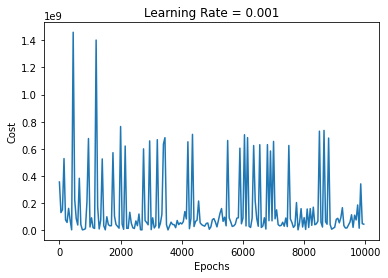

In [ ]:
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.title("Learning Rate = 0.001")
plt.xlabel('Epochs')
plt.ylabel('Cost')

In [ ]:
np.min(training_errors),np.mean(training_errors),np.max(training_errors),np.var(training_errors)

(5067.9262281798765, 5532.098092602715, 6096.845173484763, 86007.46470816006)

In [ ]:
np.min(testing_errors),np.mean(testing_errors),np.max(testing_errors),np.var(testing_errors)

(10153.737518748085,
 11431.759942161665,
 12687.447174658562,
 370143.27366863925)